In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,  HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
import warnings 
import missingno as msno
import scipy.stats as stats
from scipy.stats import chi2_contingency
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
!pip install lightgbm


     |████████████████████████████████| 1.9 MB 1.5 MB/s eta 0:00:01


In [4]:
df=pd.read_csv('/Users/hakangurler/git/mini_Dataset/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv')
df_labels=pd.read_csv('/Users/hakangurler/git/mini_Dataset/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv')


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [7]:
df_new= pd.concat([df, df_labels['damage_grade']], axis=1)
df_new.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [8]:
n_rows, n_cols = df_new.shape

print(f"this dataset has {n_rows} rows and {n_cols} columns")

this dataset has 260601 rows and 40 columns


In [9]:
df_new.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [13]:
df_new.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
df_new.describe(include='O') 
#The include='O' parameter specifies that only object-type columns 
#(typically strings or categorical variables) should be included in the summary.

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [14]:
print(df_new.isnull().sum())

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [15]:
df_new.duplicated().sum() #we dont have duplicate rows

0

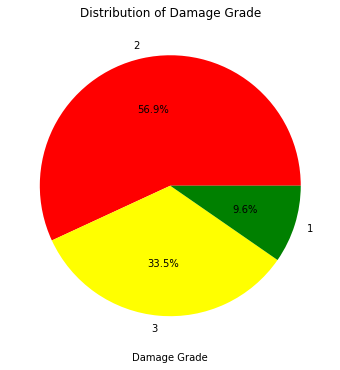

In [16]:
# Calculate the percentage of each class
class_counts = df_new['damage_grade'].value_counts(normalize=True) * 100

# Visualize the distribution
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
plt.xlabel('Damage Grade')
plt.ylabel('')

plt.title('Distribution of Damage Grade')

plt.show()

 there is an imbalance in the dataset as each category has a different percentage.

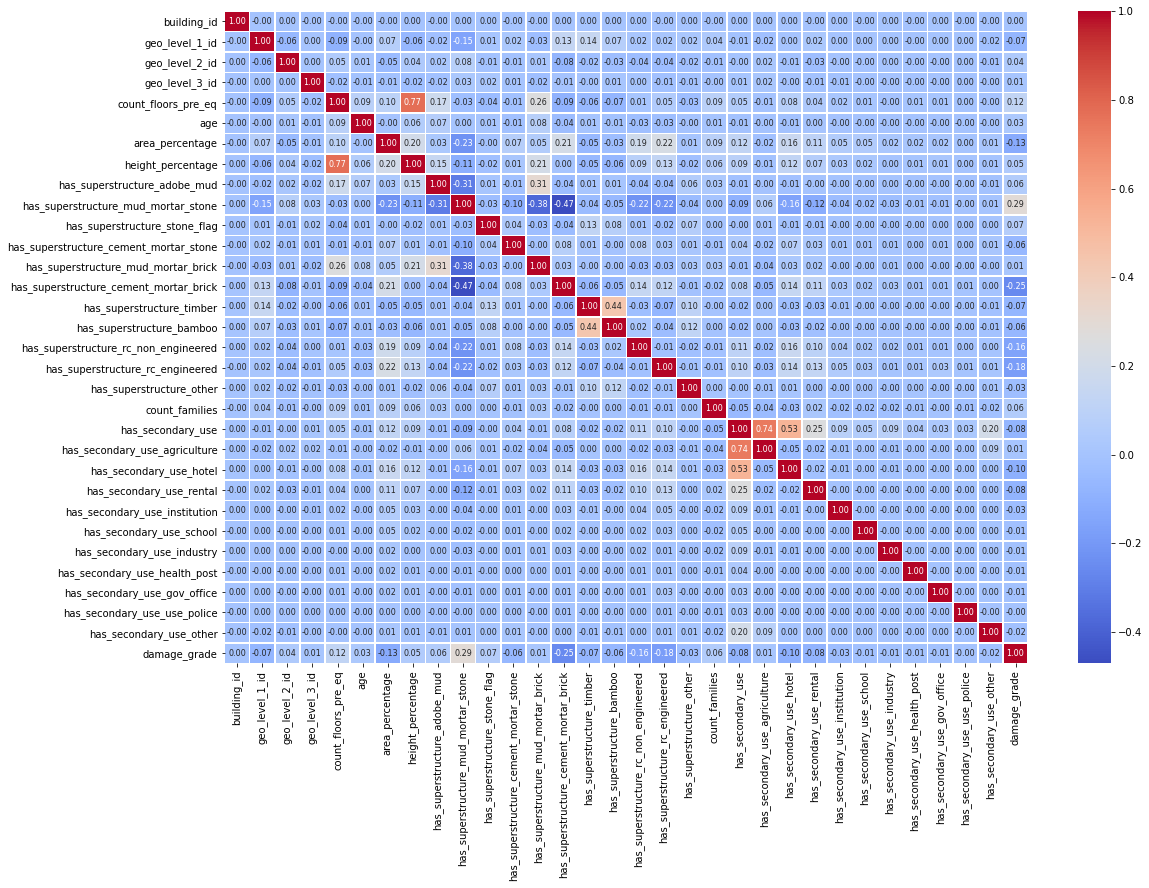

In [17]:
# Compute correlation matrix
num_vars = ['count_families', 'area_percentage', 'height_percentage', 'age', 'count_floors_pre_eq', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
corr_matrix = df_new.corr()

# Set figure size
fig, ax = plt.subplots(figsize=(18, 12))

# Plot correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, ax=ax, annot_kws={"fontsize":8})
plt.show()
     


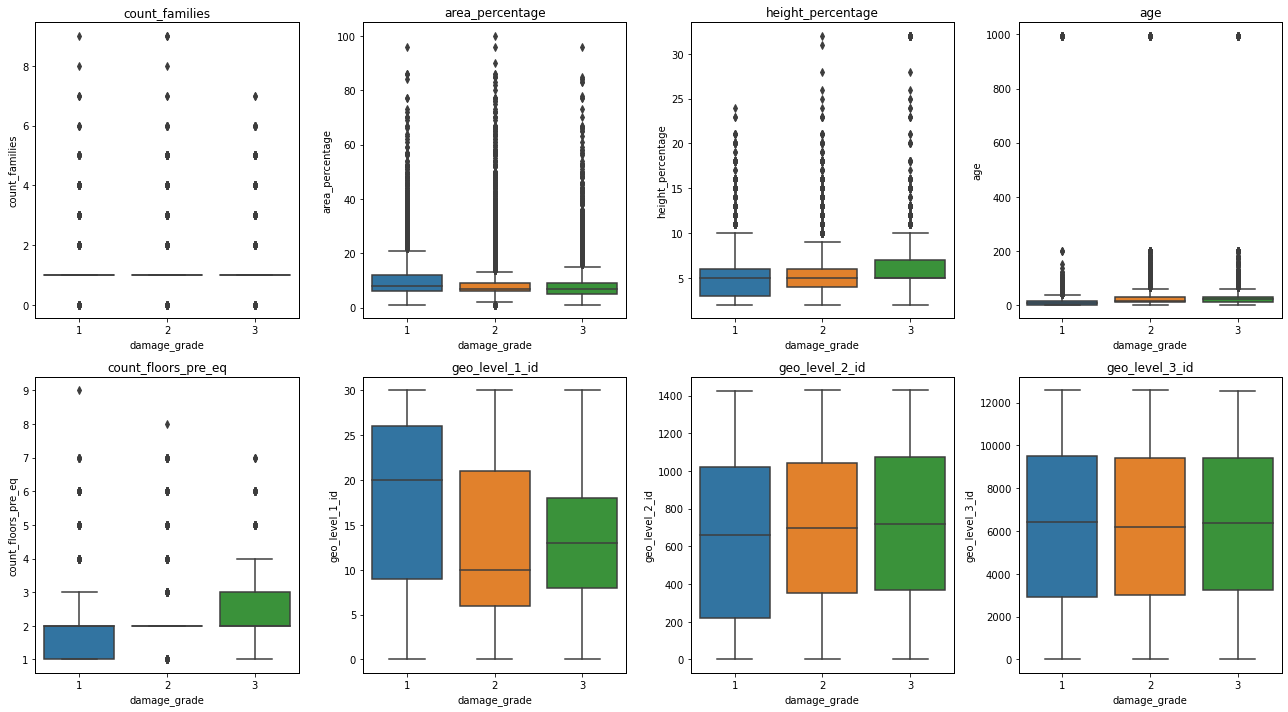

In [18]:
num_vars = ['count_families', 'area_percentage', 'height_percentage', 'age', 'count_floors_pre_eq', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
target_var = 'damage_grade'

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

for i, num_var in enumerate(num_vars):
    row = i // 4  # Calculate the row index
    col = i % 4   # Calculate the column index
    
    ax = sns.boxplot(x=target_var, y=num_var, data=df_new, ax=axs[row, col])
    ax.set_title(num_var)
    ax.set_facecolor('none')

    # Draw a frame around the subplot
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')

plt.tight_layout()
plt.show()
     
#Numerical Features correlation

This dataset contains many categorical features. For easier readability, I will group the features in 3 groups, and visualize in each cell one group of features. I will use a similar approach where I show the distribution of the feature with respect to each value of the target variable and see if the proportions change. In that case, the variables will be correlated.


#define a helper function to plot subplots, and use it for each group instead of repeating the same code. This function allows you to manage the layout, axis titles, and individual plot styles with minimal repetitive code.

In [19]:
def plot_correlation_cat_features(num_rows, num_cols, binary_vars, target_var):
  # Create the plot grid and initialize the subplot index
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 10))
  subplot_index = 0

  # Loop over the binary variables and create a stacked bar chart for each one in a separate subplot
  for binary_var in binary_vars:
      if subplot_index >= num_rows * num_cols:
          break
      row = subplot_index // num_cols
      col = subplot_index % num_cols
      ax = axs[row, col]
      
      # Calculate the count and percentage of each class
      class_counts = df_new.groupby([binary_var, target_var])[target_var].count().unstack()
      class_percentages = class_counts.div(class_counts.sum(axis=1), axis=0)
      
      # Plot the stacked bar chart with percentage labels
      class_percentages.plot(kind='bar', stacked=True, ax=ax)
      #ax.set_title(binary_var)
      ax.set_ylabel('Percentage')
      
      # Add percentage labels to the bars
      for p in ax.patches:
          width = p.get_width()
          height = p.get_height()
          x, y = p.get_xy()
          ax.annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
      
      # Move the legend to the right side of the plot
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
      
      subplot_index += 1

  # Adjust the spacing between subplots and display the plot
  plt.subplots_adjust(hspace=0.5, wspace=0.6)
  plt.show()
     

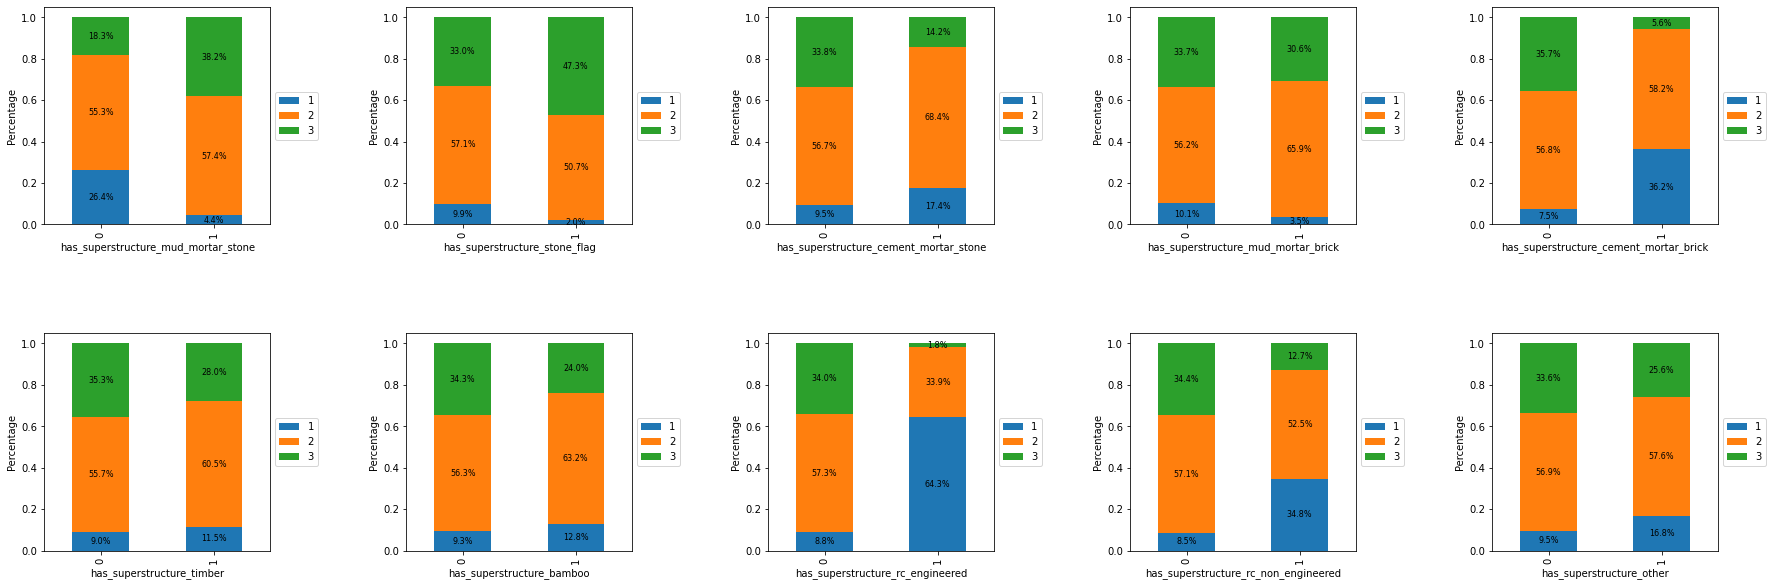

In [20]:
#Superstructure Features
	

binary_vars = ['has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 
               'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
               'has_superstructure_bamboo', 'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_other']
target_var = 'damage_grade'

# Set the number of rows and columns for the plot grid
num_rows = 2
num_cols = 5

plot_correlation_cat_features(num_rows, num_cols, binary_vars, target_var)

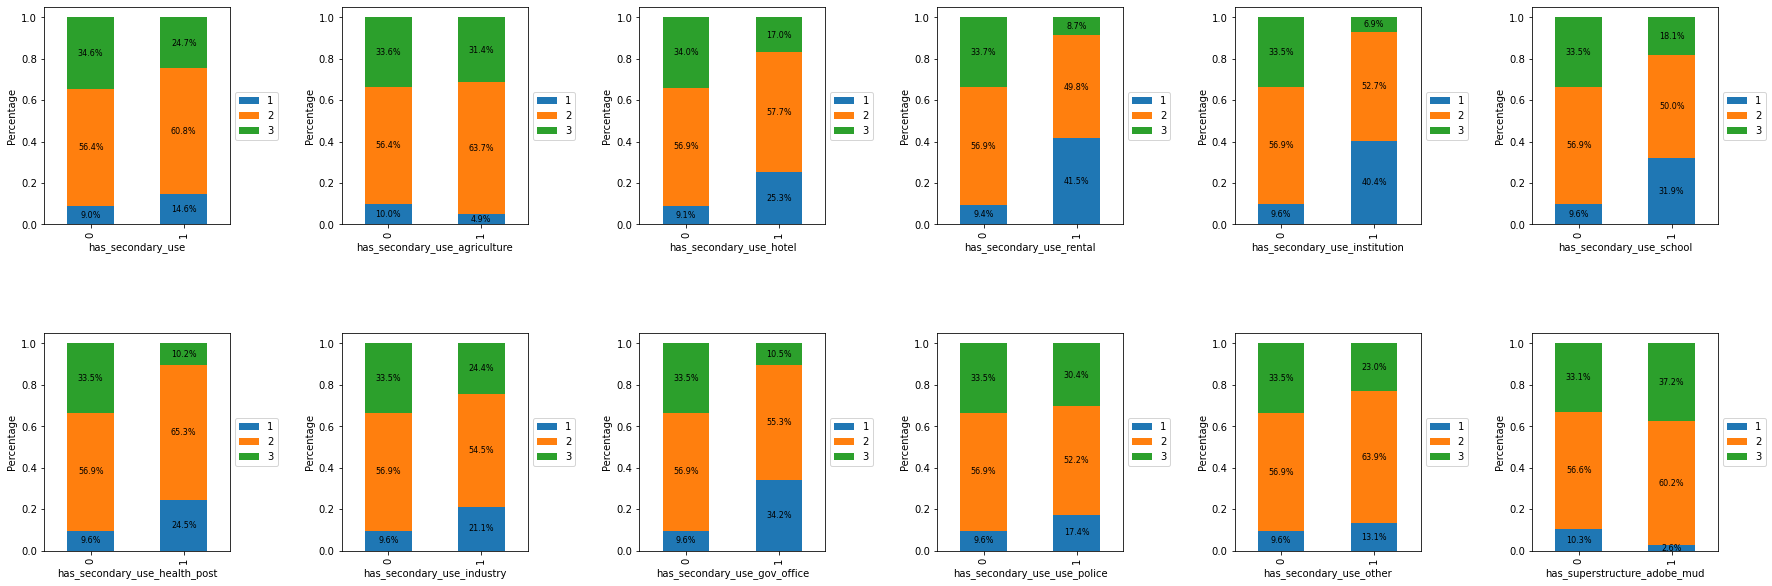

In [21]:
#Secondary User Features

binary_vars = ['has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 
               'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
               'has_secondary_use_health_post', 'has_secondary_use_industry', 'has_secondary_use_gov_office', 
               'has_secondary_use_use_police','has_secondary_use_other','has_superstructure_adobe_mud']
target_var = 'damage_grade'

# Set the number of rows and columns for the plot grid
num_rows = 2
num_cols = 6

plot_correlation_cat_features(num_rows, num_cols, binary_vars, target_var)

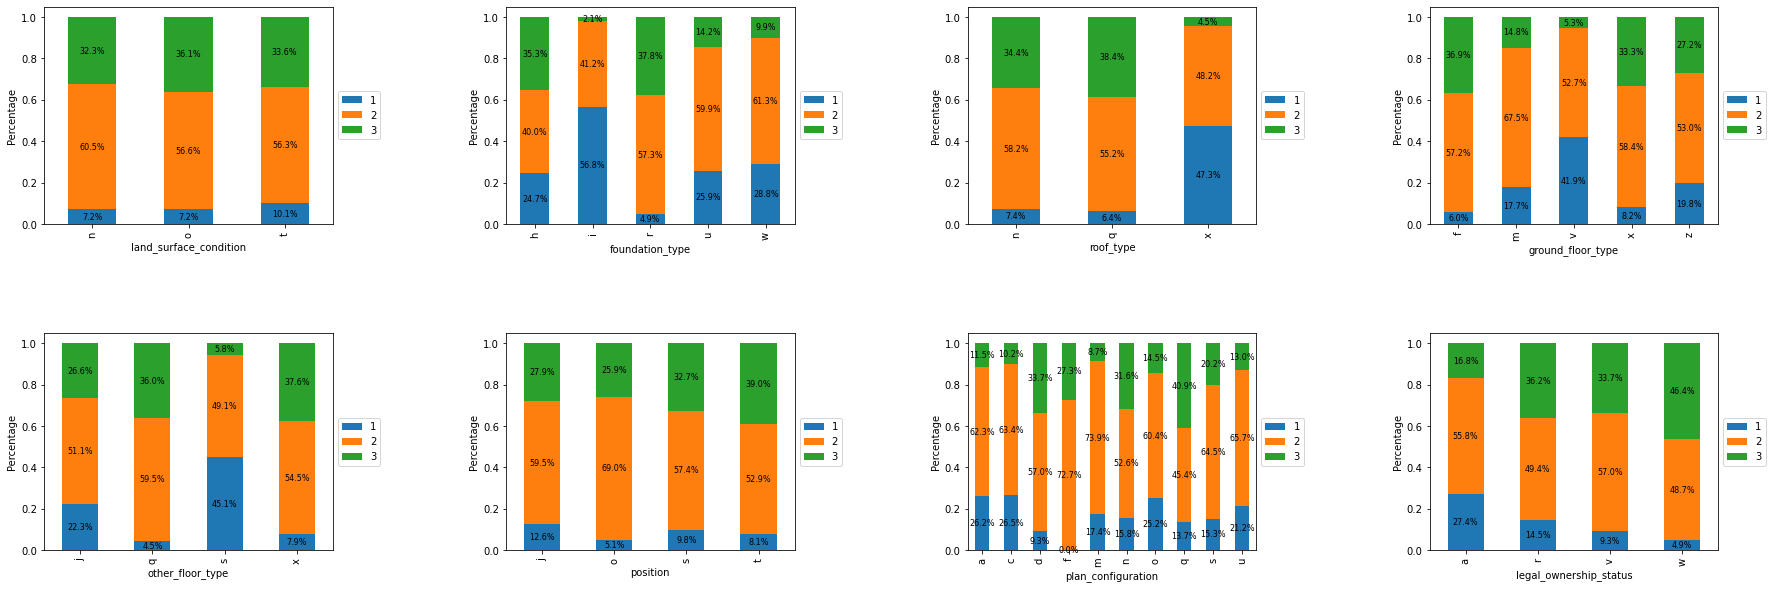

In [22]:
#Categorical Features

categorical_vars = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
                    'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
target_var='damage_grade'

# Set the number of rows and columns for the plot grid
num_rows = 2
num_cols = 4

plot_correlation_cat_features(num_rows, num_cols, categorical_vars, target_var)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(df_new.drop('damage_grade', axis=1), df_new['damage_grade'], random_state=20, shuffle=True, test_size=0.01)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(257994, 39)
(2607, 39)
(257994,)
(2607,)


In [25]:
# identify columns 
# differentiate between binary and multi-categories variable to apply Label Encoding and One Hot Encoding accordingly 

column_names = list(df_new.drop('damage_grade', axis=1).columns)
multi_class_columns = [col for col in column_names if df[col].dtype=='object' and df_new[col].nunique()>2]
binary_columns = [col for col in column_names if df[col].dtype=='object' and df_new[col].nunique()==2]
num_columns = [col for col in column_names if df_new[col].dtype!='object']
print(f"Multi Class columns: {multi_class_columns}")
print(f"Binary columns: {binary_columns}")
print(f"Numerical columns: {num_columns}")

Multi Class columns: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
Binary columns: []
Numerical columns: ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', '

In [ ]:
#create pipeline 
#drop building_id, count_families


In [26]:
def get_pipeline(model):
  pipeline = Pipeline([
      ('preprocessor', ColumnTransformer(
          transformers=[
              ('cat', OneHotEncoder(), multi_class_columns), 
              ('num', make_pipeline(
                    FunctionTransformer(lambda x: x.drop(['building_id', 'count_families'], axis=1)),
                    MinMaxScaler()
                ), num_columns),
          ]
      )),
      ('model', model)
  ])
  return pipeline

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# defining the scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score), 
           'weighted_f1': make_scorer(f1_score, average='weighted')}

models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
]


results_df_new = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 score'])

# Looping over each model and evaluate its performance on the test set
for model in models:
    pipeline = get_pipeline(model)
    # computing the cross-validation scores
    cv_results = cross_validate(pipeline, X_train, y_train, cv=3, scoring=scoring)
    model_name = type(model).__name__
    acc = cv_results["test_accuracy"].mean()
    f1 = cv_results["test_weighted_f1"].mean()
    results_df_new = results_df_new.append({
        'Model': model_name,
        'Accuracy': acc,
        'F1 score': f1
    }, ignore_index=True)
    print(model)

results_df_new

LogisticRegression()
GaussianNB()
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()


,Model,Accuracy,F1 score
0,LogisticRegression,0.590901,0.538684
1,GaussianNB,0.419068,0.339675
2,DecisionTreeClassifier,0.653170,0.653683
3,RandomForestClassifier,0.709389,0.703071
4,AdaBoostClassifier,0.645655,0.614060


In [ ]:
# RandomForest with RandomizedSearchCV with a CV=3 and 5 iterations, because it takes to much time to run

In [30]:
# Define the parameter space
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}

# Create a RandomForestClassifier object
rfc = get_pipeline(RandomForestClassifier())

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

{'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 30}


In [32]:
 #Fit the pipeline on the training data
rfc_pipeline = get_pipeline(RandomForestClassifier(n_estimators = 200, max_depth = 30, min_samples_split=5 , min_samples_leaf =4 , max_features = None ))
rfc_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc_pipeline.predict(X_val)

#Evaluate 
report = classification_report(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
print(report)
print(f"Accuracy of RFC is: {acc}")

              precision    recall  f1-score   support

           1       0.66      0.49      0.56       246
           2       0.75      0.83      0.79      1490
           3       0.74      0.66      0.70       871

    accuracy                           0.74      2607
   macro avg       0.72      0.66      0.68      2607
weighted avg       0.74      0.74      0.74      2607

Accuracy of RFC is: 0.7414652857690832


In [ ]:
def train_stack_model() 

In [53]:
# Create the three base models
lgbm_model = lgb.LGBMClassifier(n_estimators=350, learning_rate=0.1,max_bin=95, max_depth=30, num_leaves=200)
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()

# Create the logistic regression meta-model
logreg_model = LogisticRegression()

# Create the stacking classifier
stacked_model = StackingClassifier(
    estimators=[('lgbm', lgbm_model), ('rf', rf_model), ('ada', ada_model)],
    final_estimator=logreg_model
)

# Fit the stacking classifier on the training data
stacked_pipe = get_pipeline(stacked_model)
stacked_pipe.fit(X_train, y_train)

# Evaluate the performance of the stacking classifier on the test data
y_pred = stacked_pipe.predict(X_val)

report = classification_report(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
print(report)
print(f"Accuracy of RFC is: {acc}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 257994, number of used features: 67
[LightGBM] [Info] Start training from score -2.338952
[LightGBM] [Info] Start training from score -0.564076
[LightGBM] [Info] Start training from score -1.094562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 206395, number of used features: 66
[LightGBM] [Info] Start training from score -2.338921
[LightGBM] [Info] Start training from score -0.564077
[LightGBM] [Info] Start 

In [56]:
# For Target Encoding, we can use the category_encoders library
!pip install category_encoders

import category_encoders as ce

# Define the columns to be target encoded
geo_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

# Initialize the Target Encoder
# Create the encoder and specify the columns to encode
target_encoder = ce.TargetEncoder(cols=geo_columns)

# Fit the encoder on the training data
# Assuming 'df_new' is your training DataFrame and 'damage_grade' is your target column
df_new[geo_columns] = target_encoder.fit_transform(df_new[geo_columns], df_new['damage_grade'])

# Step 5: Apply the same encoding to the test set
# Assuming 'X_test' is your test DataFrame
X_test[geo_columns] = target_encoder.transform(X_test[geo_columns])

# Step 6: Check the result
print("Training data after Target Encoding:")
print(df_new[geo_columns].head())

print("Test data after Target Encoding:")
print(X_test[geo_columns].head())



Training data after Target Encoding:
   geo_level_1_id  geo_level_2_id  geo_level_3_id
0        2.161724        2.740741        2.745226
1        2.485273        2.487437        2.167733
2        2.563369        2.518750        2.580879
3        2.000960        2.107317        2.132112
4        2.337713        2.348748        2.368848
Test data after Target Encoding:
   geo_level_1_id  geo_level_2_id  geo_level_3_id
0        2.794480        2.705033        2.425101
1        2.161724        2.180851        2.178766
2        2.000960        2.182542        2.346324
3        1.730887        1.532194        1.437788
4        2.794480        2.689119        2.487333


In [57]:
from sklearn.model_selection import KFold
import numpy as np

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a copy of the original dataframe
df_encoded = df_new.copy()

# Create a new column to store the encoded values
for col in geo_columns:
    df_encoded[col + '_target_enc'] = np.nan

# Apply Target Encoding within each fold
for train_index, val_index in kf.split(df_new):
    # Split the data into training and validation within the fold
    train, valid = df_new.iloc[train_index], df_new.iloc[val_index]
    
    # Fit the encoder on the current training fold
    target_encoder = ce.TargetEncoder(cols=geo_columns)
    target_encoder.fit(train[geo_columns], train['damage_grade'])
    
    # Transform the training and validation sets
    df_encoded.iloc[val_index][geo_columns] = target_encoder.transform(valid[geo_columns])

# Apply encoding to the entire training and test sets using the fitted encoder
target_encoder.fit(df_new[geo_columns], df_new['damage_grade'])
df_new[geo_columns] = target_encoder.transform(df_new[geo_columns])
X_test[geo_columns] = target_encoder.transform(X_test[geo_columns])


In [58]:
# Define the parameter space
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}

# Create a RandomForestClassifier object
rfc = get_pipeline(RandomForestClassifier())

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

{'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 30}


In [59]:
 #Fit the pipeline on the training data
rfc_pipeline = get_pipeline(RandomForestClassifier(n_estimators = 200, max_depth = 30, min_samples_split=5 , min_samples_leaf =4 , max_features = None ))
rfc_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc_pipeline.predict(X_val)

#Evaluate 
report = classification_report(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
print(report)
print(f"Accuracy of RFC is: {acc}")

              precision    recall  f1-score   support

           1       0.67      0.47      0.55       246
           2       0.75      0.83      0.79      1490
           3       0.75      0.67      0.71       871

    accuracy                           0.74      2607
   macro avg       0.72      0.66      0.68      2607
weighted avg       0.74      0.74      0.74      2607

Accuracy of RFC is: 0.7437667817414653


In [61]:
# Create the three base models
lgbm_model = lgb.LGBMClassifier(n_estimators=350, learning_rate=0.1,max_bin=95, max_depth=30, num_leaves=200)
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()

# Create the logistic regression meta-model
logreg_model = LogisticRegression()

# Create the stacking classifier
stacked_model = StackingClassifier(
    estimators=[('lgbm', lgbm_model), ('rf', rf_model), ('ada', ada_model)],
    final_estimator=logreg_model
)

# Fit the stacking classifier on the training data
stacked_pipe = get_pipeline(stacked_model)
stacked_pipe.fit(X_train, y_train)

# Evaluate the performance of the stacking classifier on the test data
y_pred = stacked_pipe.predict(X_val)

report = classification_report(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
print(report)
print(f"Accuracy of RFC is: {acc}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 234540, number of used features: 67
[LightGBM] [Info] Start training from score -2.340650
[LightGBM] [Info] Start training from score -0.563779
[LightGBM] [Info] Start training from score -1.094578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 187632, number of used features: 65
[LightGBM] [Info] Start training from score -2.340617
[LightGBM] [Info] Start training from score -0.563778
[LightGBM] [Info] Start 

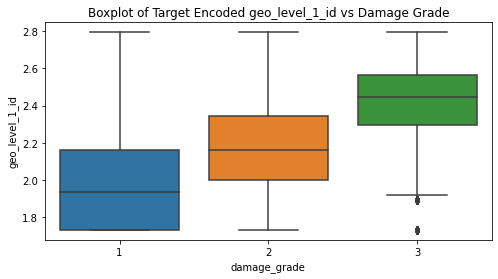

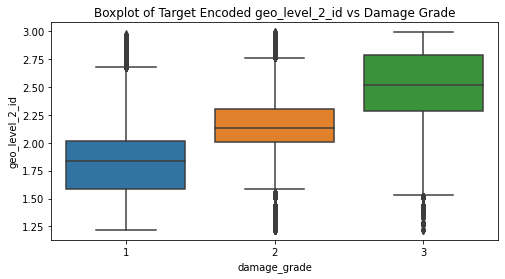

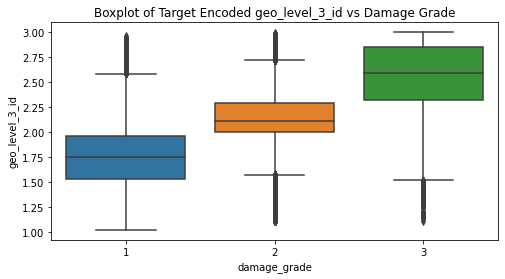

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check correlation between encoded features and damage grade
for col in geo_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_new['damage_grade'], y=df_new[col])
    plt.title(f'Boxplot of Target Encoded {col} vs Damage Grade')
    plt.show()


In [63]:
from sklearn.model_selection import KFold
import category_encoders as ce
import pandas as pd

# Create a new copy of the data
df_encoded = df_new.copy()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df_encoded):
    train_data = df_encoded.iloc[train_idx]
    val_data = df_encoded.iloc[val_idx]
    
    # Fit the target encoder on training data within the fold
    target_encoder = ce.TargetEncoder(cols=geo_columns)
    target_encoder.fit(train_data[geo_columns], train_data['damage_grade'])

    # Transform train and validation within the fold
    df_encoded.iloc[val_idx, df_encoded.columns.get_loc('geo_level_1_id')] = target_encoder.transform(val_data[geo_columns])['geo_level_1_id']
    df_encoded.iloc[val_idx, df_encoded.columns.get_loc('geo_level_2_id')] = target_encoder.transform(val_data[geo_columns])['geo_level_2_id']
    df_encoded.iloc[val_idx, df_encoded.columns.get_loc('geo_level_3_id')] = target_encoder.transform(val_data[geo_columns])['geo_level_3_id']


In [66]:
import pandas as pd
import numpy as np

# Step 1: Identify columns with string values in training and test sets
print("Data Types of Training Set Columns:\n", X_train.dtypes)

# Check for columns with string values
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Column '{col}' in training set contains string values. Unique values: {X_train[col].unique()}")

for col in X_test.columns:
    if X_test[col].dtype == 'object':
        print(f"Column '{col}' in test set contains string values. Unique values: {X_test[col].unique()}")

# Step 2: Replace problematic string values like 't' with NaN
X_train.replace('t', np.nan, inplace=True)
X_test.replace('t', np.nan, inplace=True)

# Step 3: Convert columns to numeric format
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Step 4: Handle missing values (NaN) created during conversion
# Fill missing values with the median value of the column
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Verify the data types again
print("Updated Data Types of Training Set Columns:\n", X_train.dtypes)


Data Types of Training Set Columns:
 building_id                                 int64
geo_level_1_id                            float64
geo_level_2_id                            float64
geo_level_3_id                            float64
count_floors_pre_eq                         int64
age                                         int64
area_percentage                             int64
height_percentage                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstru

In [74]:
X_train.fillna(X_train.median(), inplace=True)  # Fill missing values in numerical columns with median
X_test.fillna(X_test.median(), inplace=True)    # Apply same filling strategy to the test set
print(X_train)

        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
190168       760482        2.563369        2.925168        2.923076   
23486        346298        2.162136        2.585903        2.380952   
113253       258678        2.297726        2.082447        1.941756   
80690        163662        2.341954        2.563830        2.935463   
231498       339483        1.937656        1.826241        1.728222   
...             ...             ...             ...             ...   
259178        79888        1.937656        2.108696        2.243221   
103694       442764        2.341954        2.273556        2.747235   
131932        17256        2.485273        2.142473        2.052632   
146867       496181        2.341954        2.171429        2.085274   
121958       246461        2.297726        2.021845        1.988633   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
190168                    1    5                3                  2   
234

In [75]:
# Check for NaNs in the training and test datasets
print("Number of NaNs in Each Column (Training Set):\n", X_train.isna().sum())
print("Number of NaNs in Each Column (Test Set):\n", X_test.isna().sum())


Number of NaNs in Each Column (Training Set):
 building_id                                    0
geo_level_1_id                                 0
geo_level_2_id                                 0
geo_level_3_id                                 0
count_floors_pre_eq                            0
age                                            0
area_percentage                                0
height_percentage                              0
land_surface_condition                    234540
foundation_type                           234540
roof_type                                 234540
ground_floor_type                         234540
other_floor_type                          234540
position                                  234540
plan_configuration                        234540
has_superstructure_adobe_mud                   0
has_superstructure_mud_mortar_stone            0
has_superstructure_stone_flag                  0
has_superstructure_cement_mortar_stone         0
has_superstructure_mud

In [73]:
# Fill NaNs in X_train and X_test with median values of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

